In [1]:
# Import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# Load the dataset 
data = pd.read_csv("C:\\Users\\marin\\Jupyter Notebooks\\Employee Attrition Analysis\\HR-Employee-Attrition.csv")

- Task 4: Initial Data Inspection:

    - Display the first few rows using df.head() to get a glimpse of the data.

    - Use df.info() to check the data types of each column and identify missing values.

    - Use df.describe() to get descriptive statistics for numerical columns (e.g., mean, standard deviation, min, max).  This helps understand the distribution of the data.

In [2]:
# Display first few rows 
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Check data types and identify missing values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# Get descriptive statistics for numerical columns
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


II. Data Cleaning and Preprocessing

- Task 5: Handle Missing Values:

    - Check for missing values using df.isnull().sum().  

In [5]:
# Handle missing values if existed 
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- Task 6: Feature Engineering:

    - Create new features that might be relevant to attrition:
    
        - YearsSinceLastPromotion: This feature already exists, but ensure it's clean.
        
        - TotalWorkingYears: This feature also exists, but ensure it's clean.
        
        - YearsWithCurrManager: Exists, ensure clean.
        
        - No need to create new features, but we will analyze existing ones.

In [7]:
# Check features that are relevant to attrition are "clean"
attr_col = data[['YearsSinceLastPromotion', 'TotalWorkingYears', 'YearsWithCurrManager']]
attr_col

,YearsSinceLastPromotion,TotalWorkingYears,YearsWithCurrManager
0,0,8,5
1,1,10,7
2,0,7,0
3,3,8,0
4,2,6,2
...,...,...,...
1465,0,17,3
1466,1,9,7
1467,0,6,3
1468,0,17,8


- Task 7: Encode Categorical Variables:

    - Identify categorical columns using df.select_dtypes(include=['object']).columns.
    
    - Encode categorical variables into numerical representations using LabelEncoder or one-hot encoding (using pd.get_dummies()).  For this dataset, we'll use LabelEncoder for simplicity, but one-hot encoding is often preferred for nominal categorical data.

In [11]:
# Identify categorical columns 
cat_cols = data.select_dtypes(include=['object']).columns
cat_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [12]:
# Encode categorical columns 
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Print first 5 rows 
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [13]:
# Check again data types
data.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

- Task 8: Feature Scaling:

    - Scale numerical features to a similar range using StandardScaler. This is important for many machine learning algorithms.

In [14]:
# Separate features and target variable 
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features 
numerical_cols = X_train.select_dtypes(include=np.number).columns 
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

X_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1097,-1.388559,0.589281,-1.108139,-0.500174,1.440396,-0.863356,2.085607,0.0,0.860666,0.279706,...,-0.639822,0.0,2.547471,-1.167368,0.157319,0.357435,-0.974263,-0.888208,-0.676110,-1.142448
727,-2.040738,-2.463556,-1.263481,-0.500174,-0.522699,-0.863356,-0.930284,0.0,-0.026811,-0.639104,...,1.211176,0.0,-0.945525,-1.423397,-0.613546,0.357435,-1.138573,-1.165051,-0.676110,-1.142448
254,-0.845077,0.589281,1.103647,1.391159,1.317703,-0.863356,-0.176312,0.0,-1.118456,1.198515,...,1.211176,0.0,0.218807,-0.143254,-0.613546,0.357435,-0.645643,-0.611364,-0.676110,-0.575084
1175,0.241886,0.589281,-0.758001,-0.500174,0.336155,0.099933,0.577661,0.0,1.030258,1.198515,...,0.285677,0.0,-0.945525,-0.527297,0.157319,0.357435,-0.317023,-0.057676,-0.355244,-1.142448
1341,-0.627685,0.589281,-1.204303,-0.500174,1.317703,0.099933,-0.930284,0.0,1.404019,-0.639104,...,-1.565321,0.0,0.218807,-0.143254,-0.613546,0.357435,0.504527,1.049700,-0.676110,-0.575084


III. Exploratory Data Analysis (EDA)

- Task 9: Univariate Analysis:

    - Analyze the distribution of individual features:
    
        - For numerical features: Use histograms, box plots, or kernel density plots.
        
        - For categorical features: Use bar plots (after encoding).

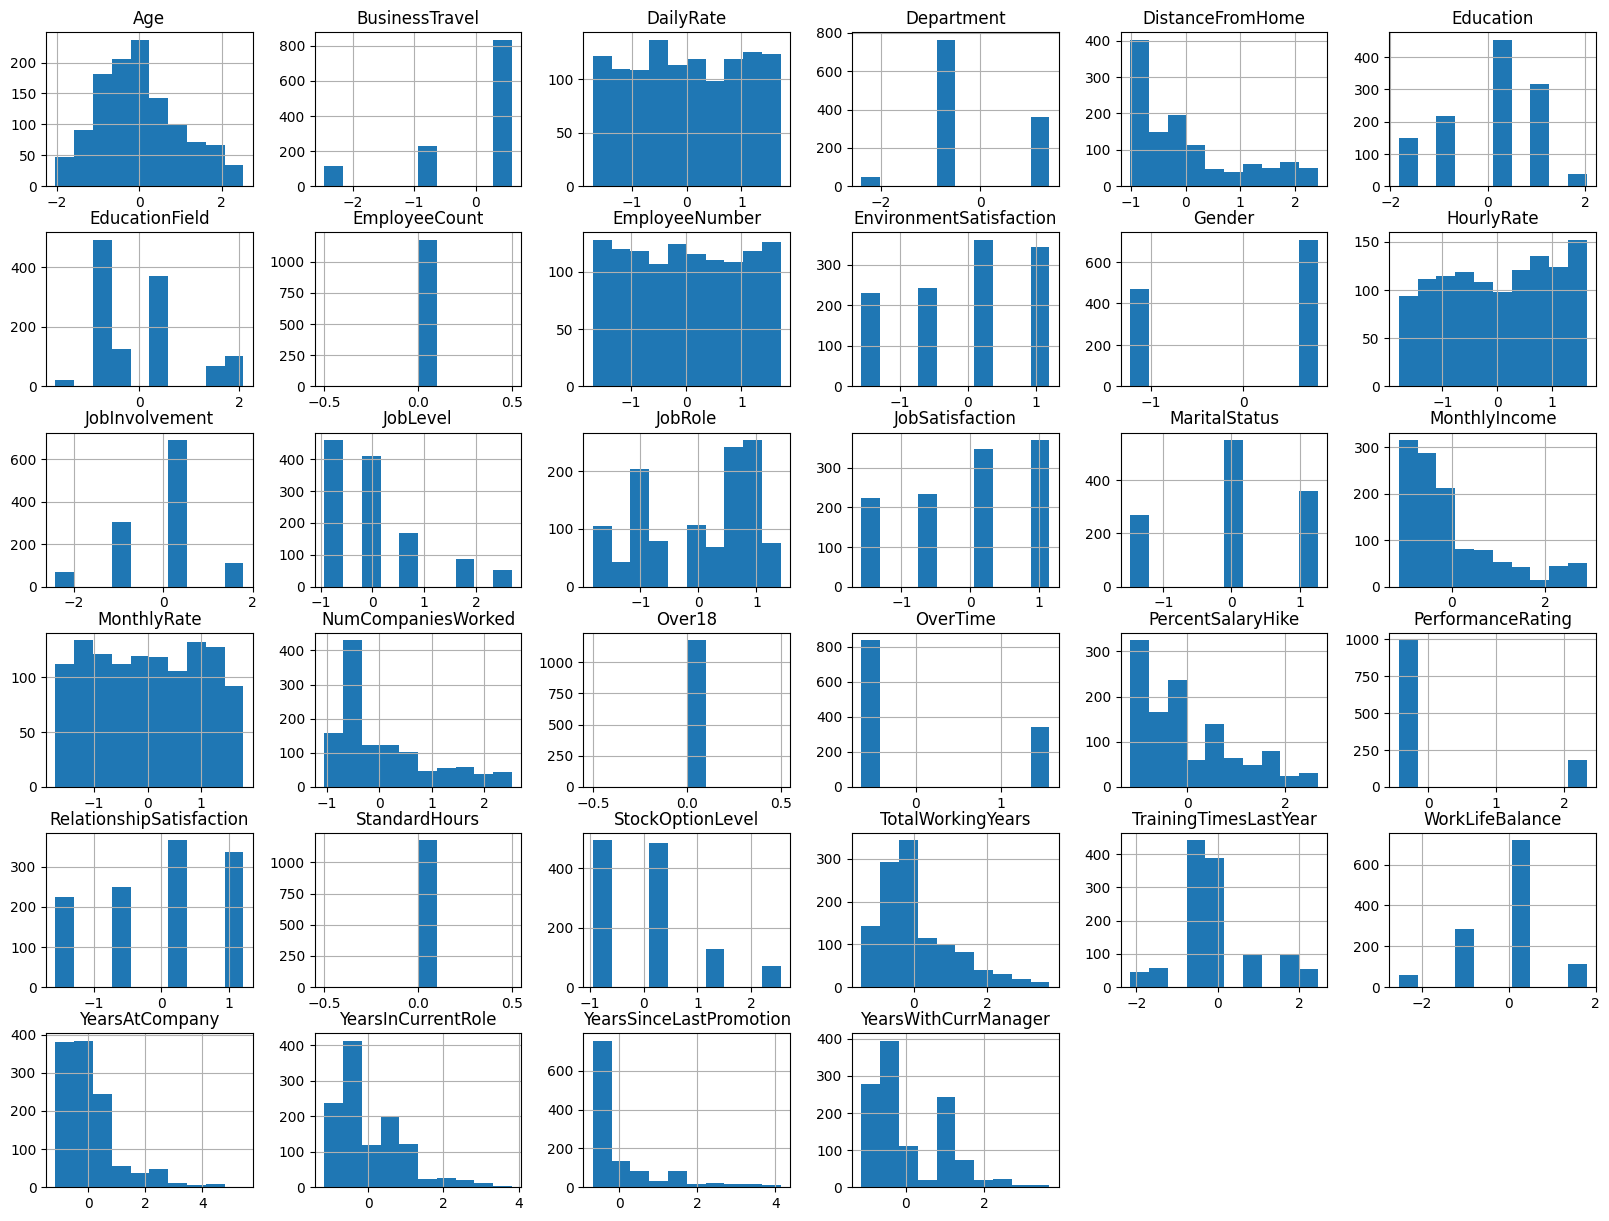

In [15]:
# Plot histograms for numerical features 
X_train.hist(figsize=(20,15))
plt.show()

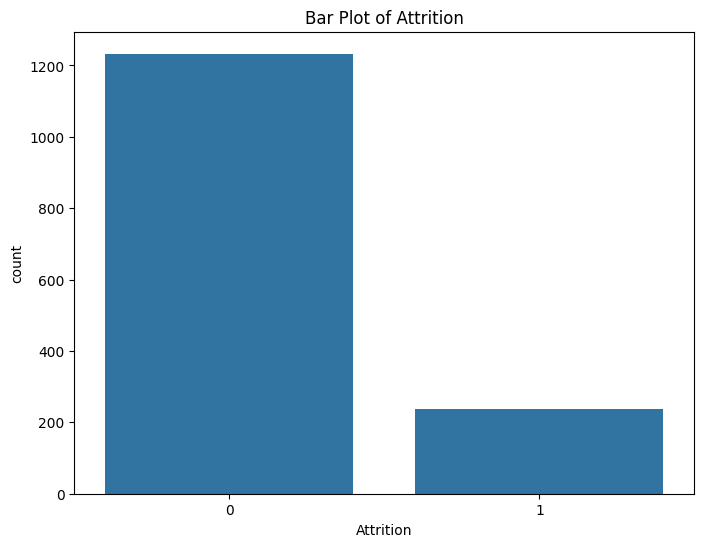

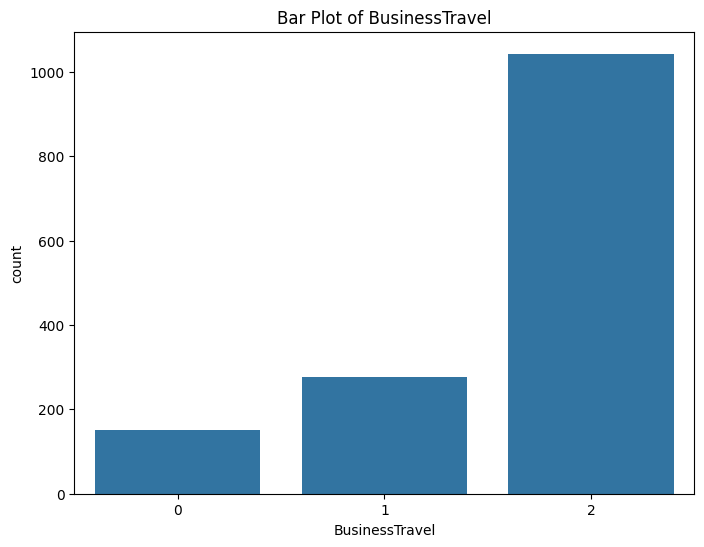

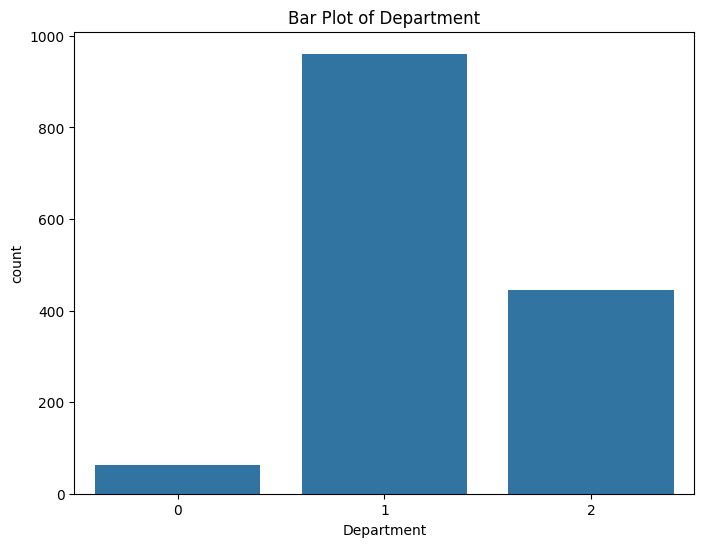

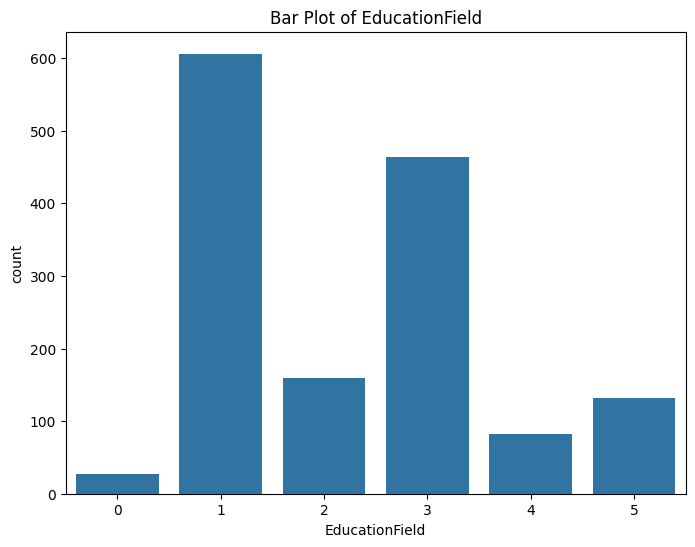

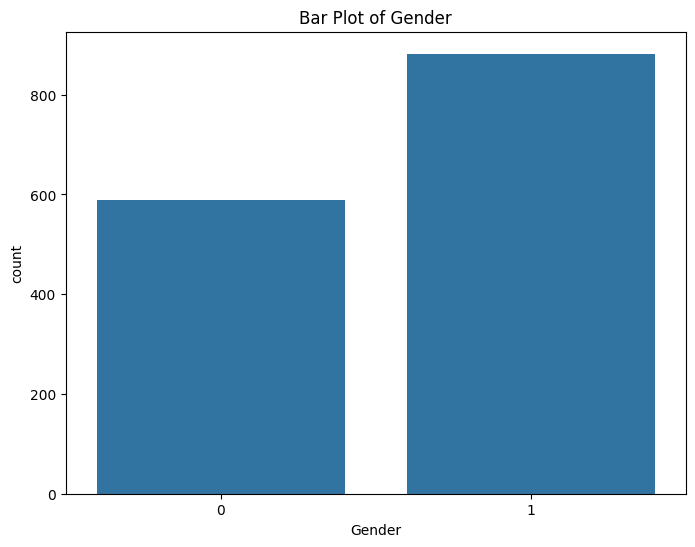

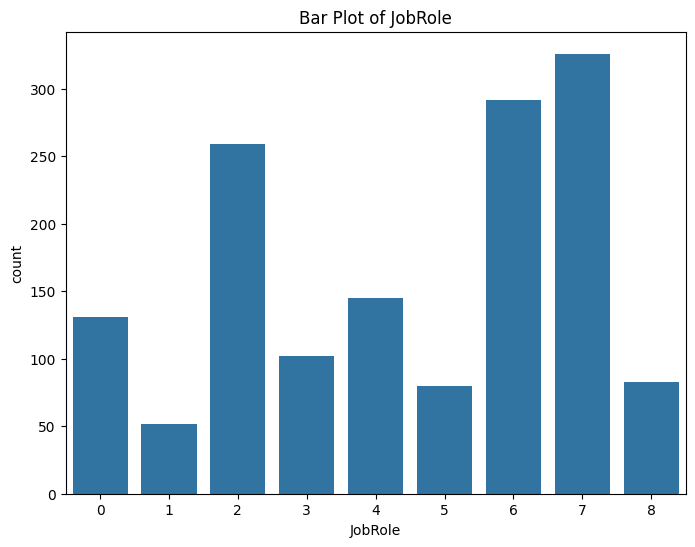

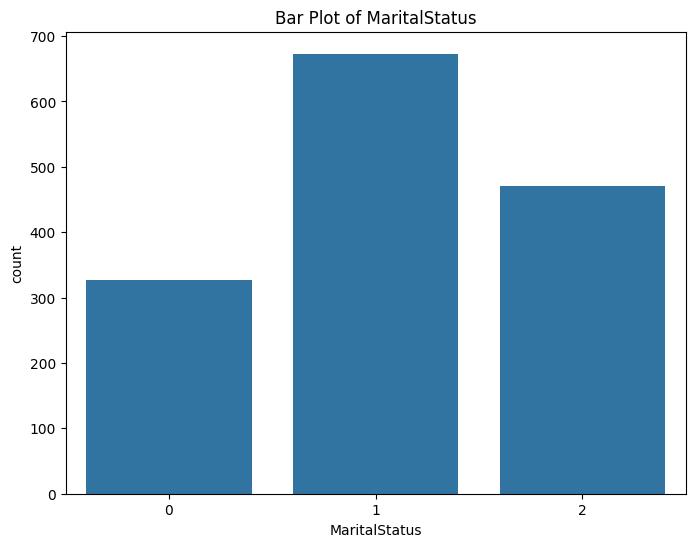

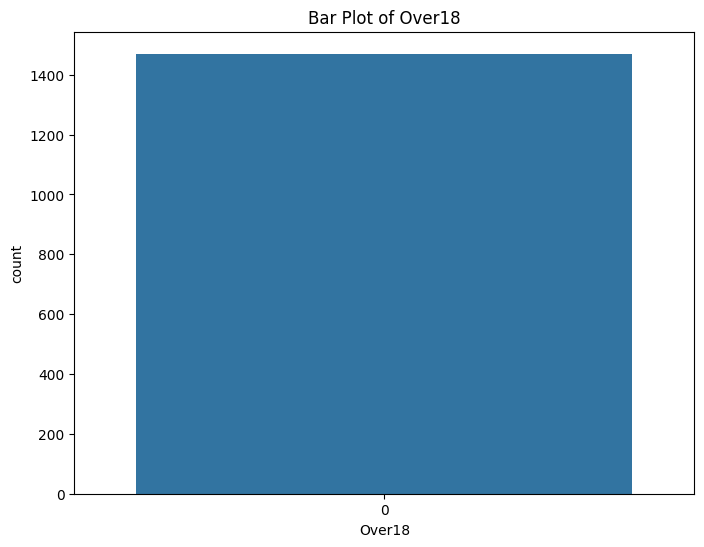

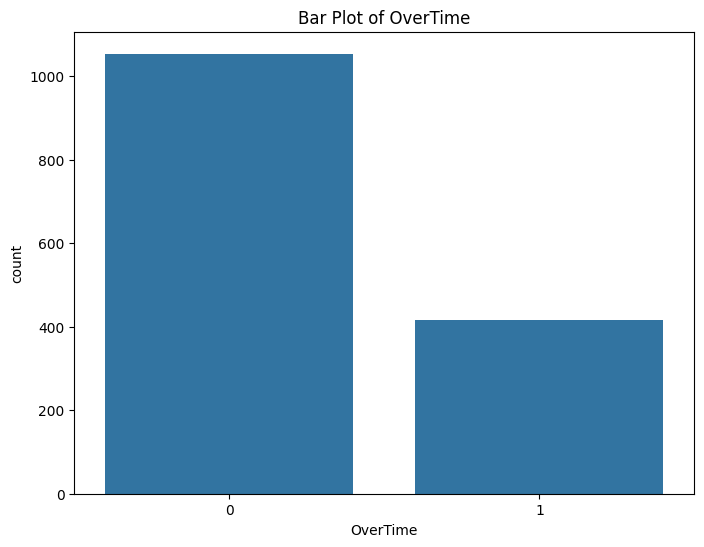

In [17]:
# Plot bar plots for categorical features 
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Bar Plot of {col}')
    plt.show()

- Task 10: Bivariate Analysis:

    - Explore the relationship between features and the target variable (Attrition):
    
        - Use grouped bar charts or stacked bar charts to visualize the attrition rate for different categorical groups.
        
        - Use box plots or violin plots to visualize the distribution of numerical features for different attrition groups.
        
        - Use correlation matrices and heatmaps to visualize the correlation between numerical features and Attrition.

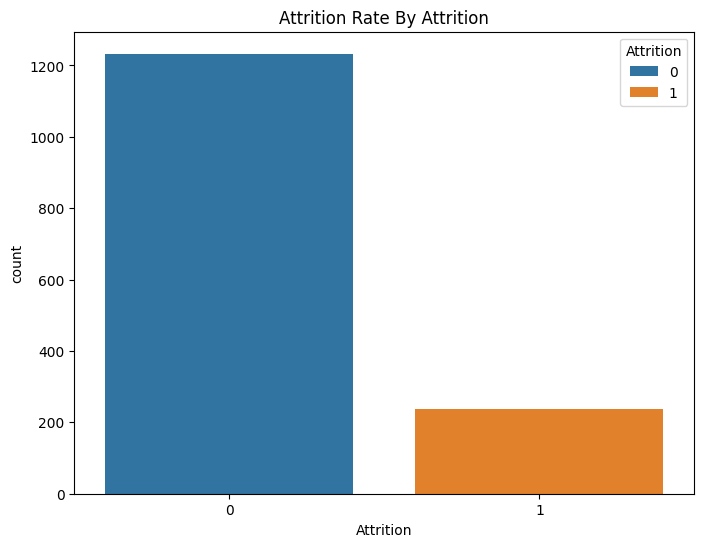

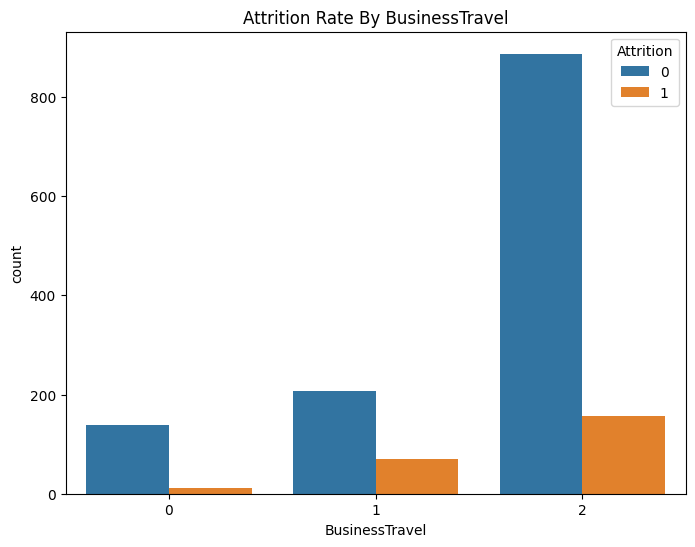

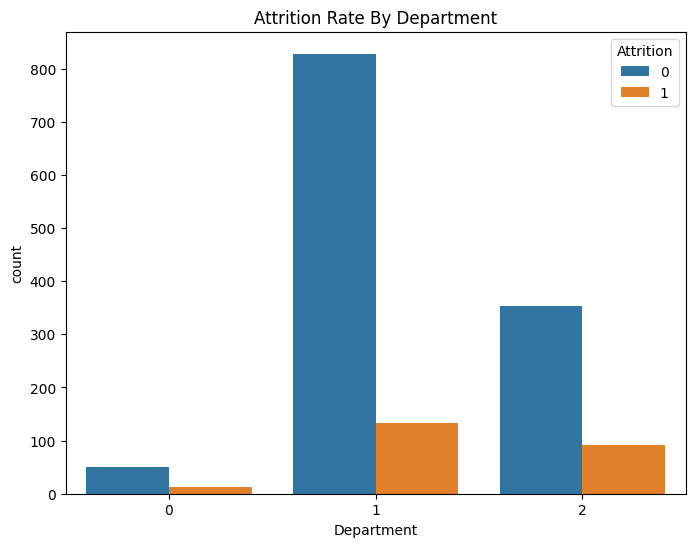

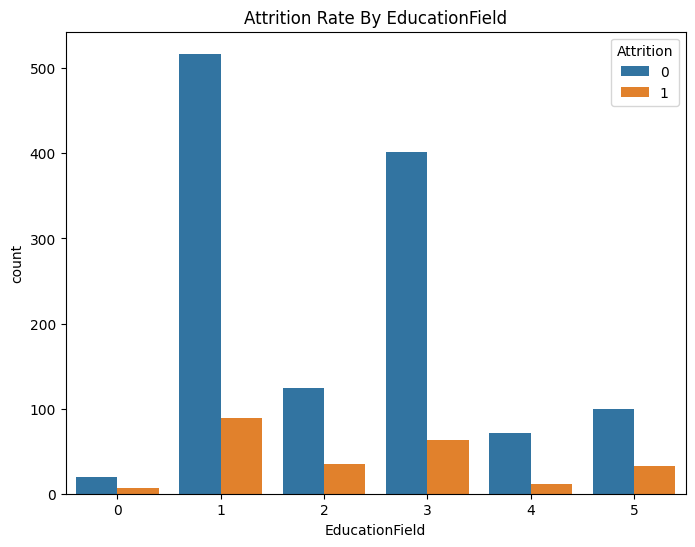

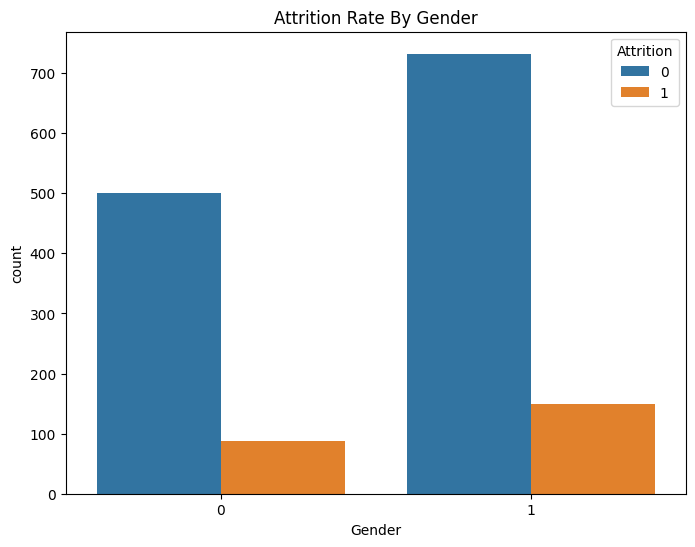

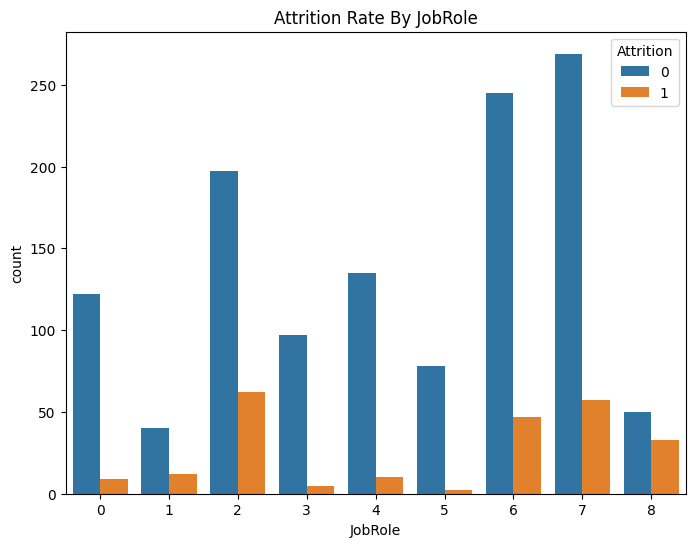

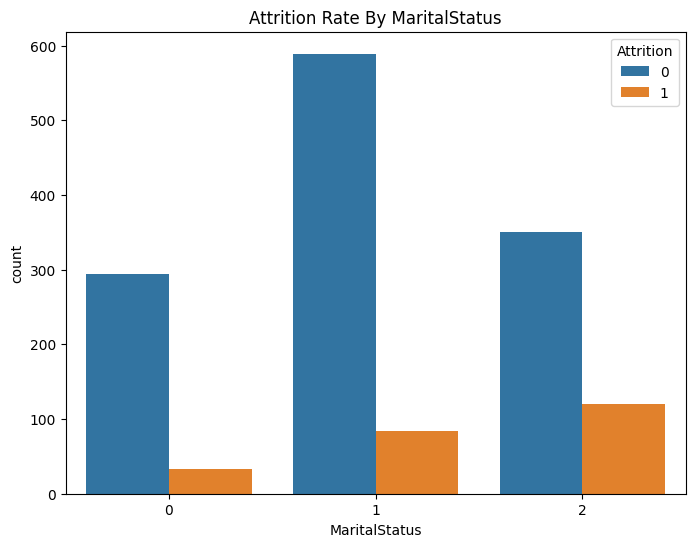

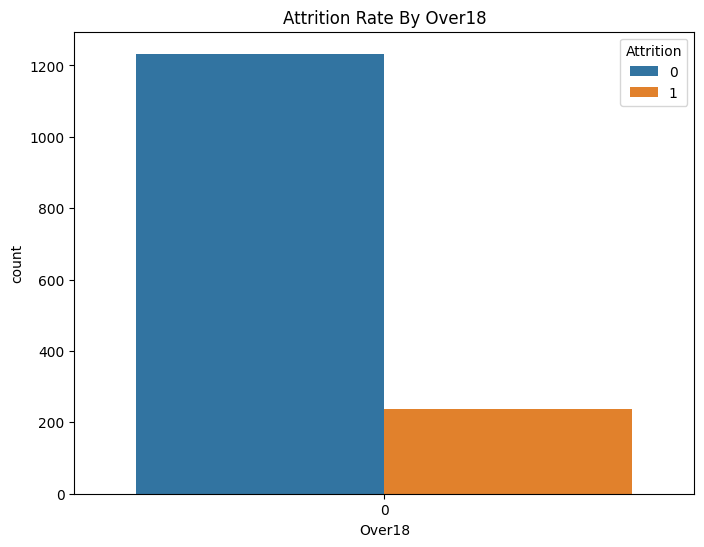

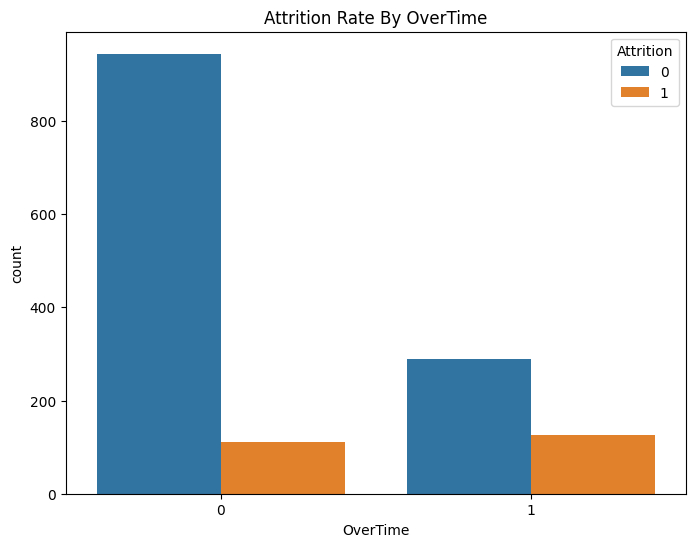

In [18]:
# Visualize attrition rate by categorical features 
for col in cat_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, hue='Attrition', data=data)
    plt.title(f"Attrition Rate By {col}")
    plt.show()

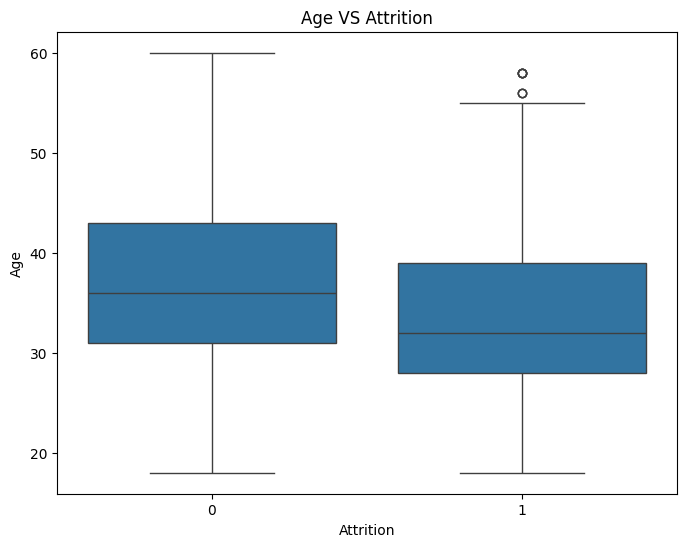

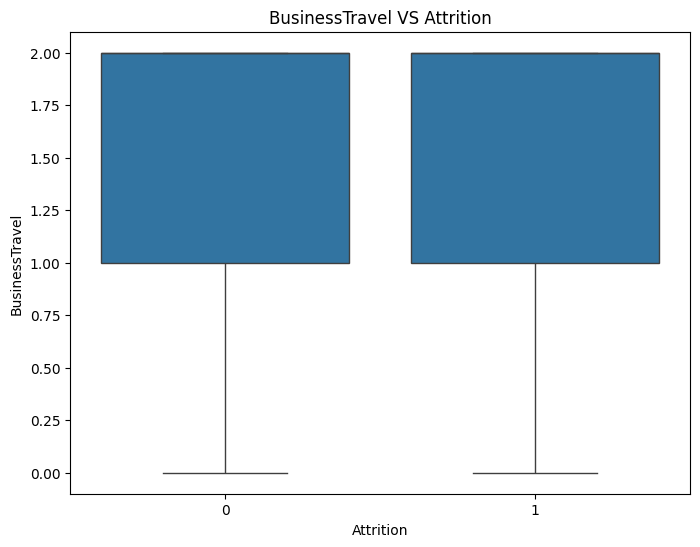

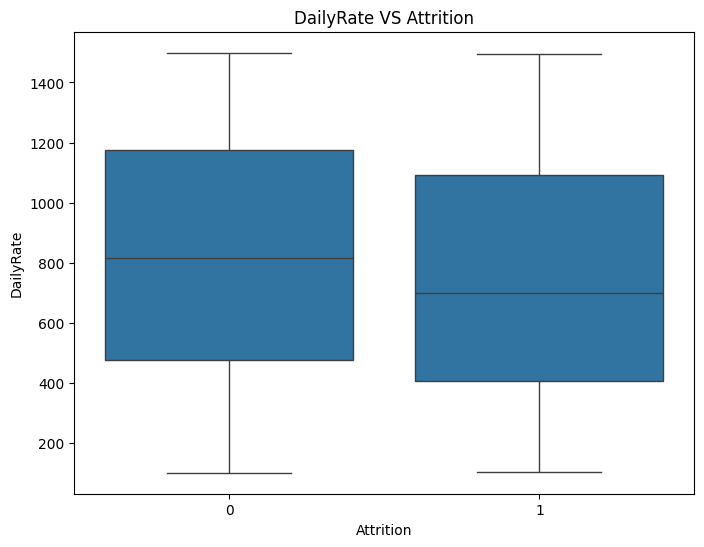

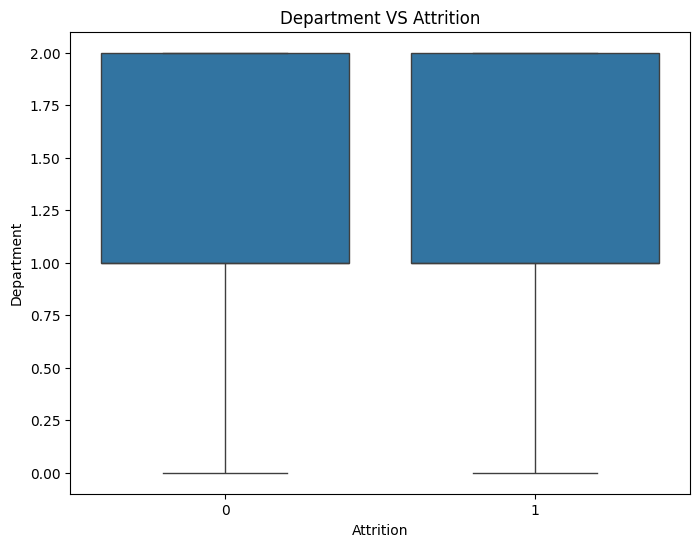

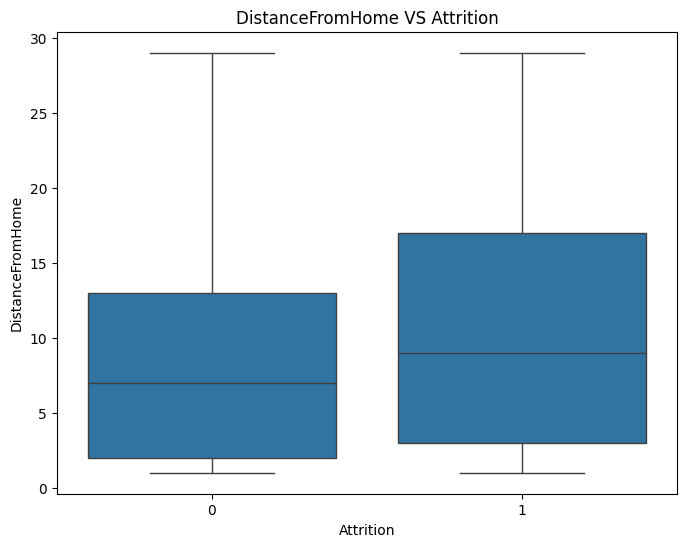

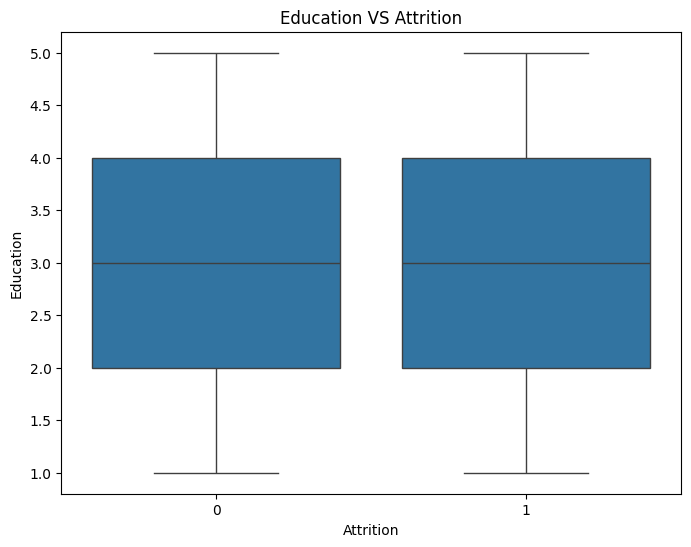

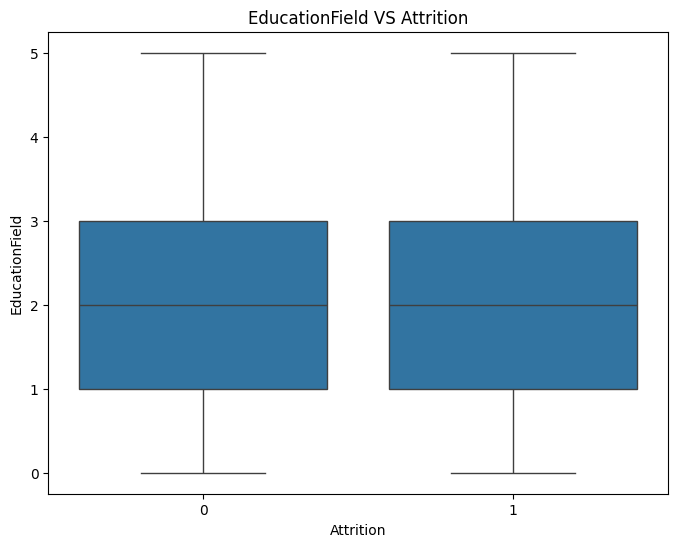

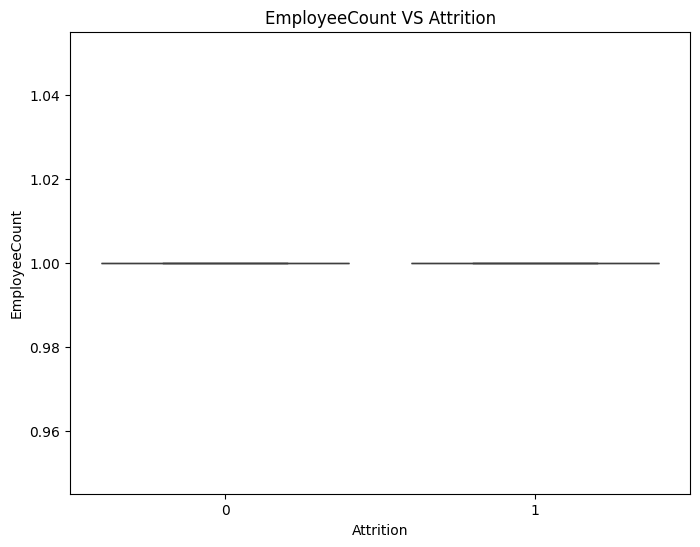

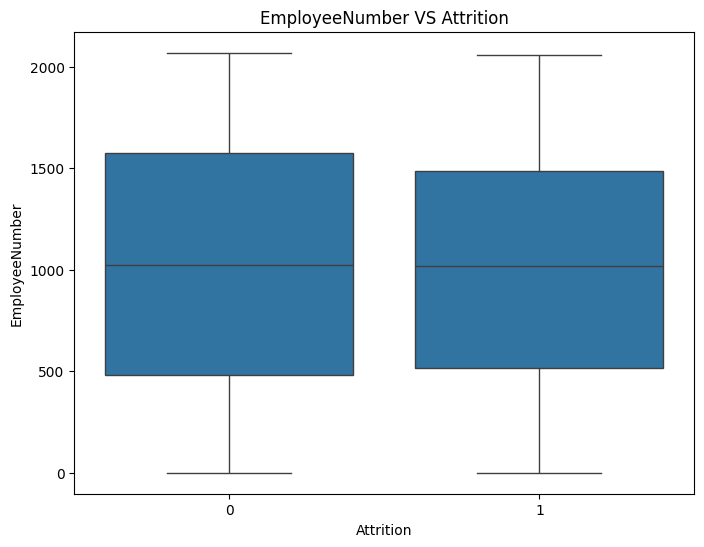

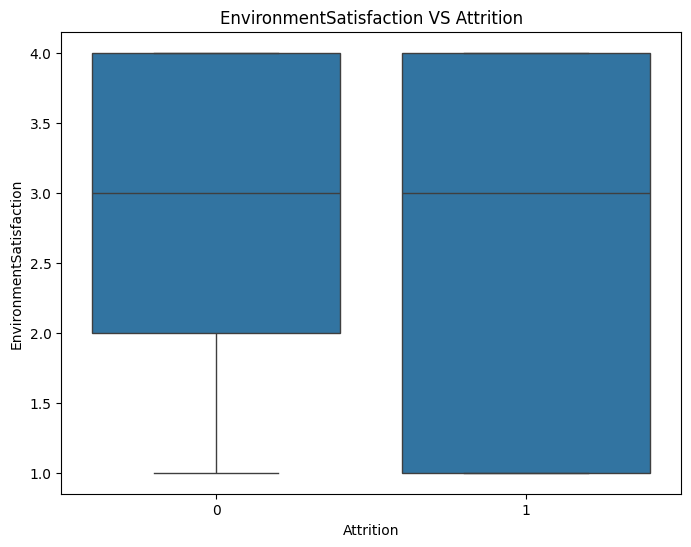

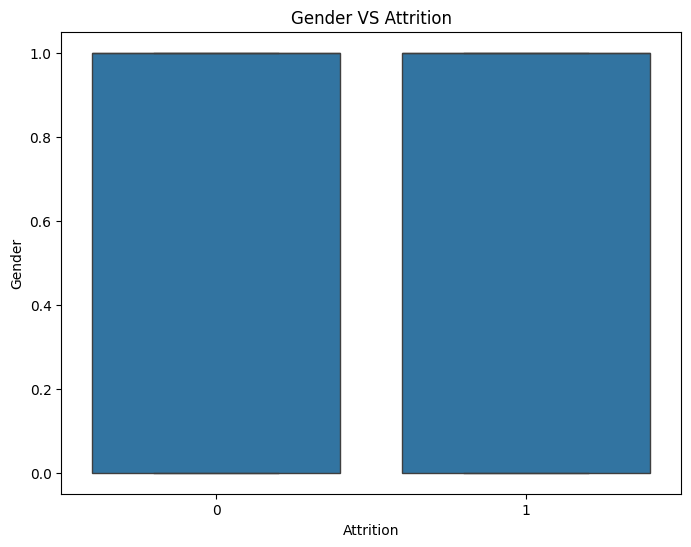

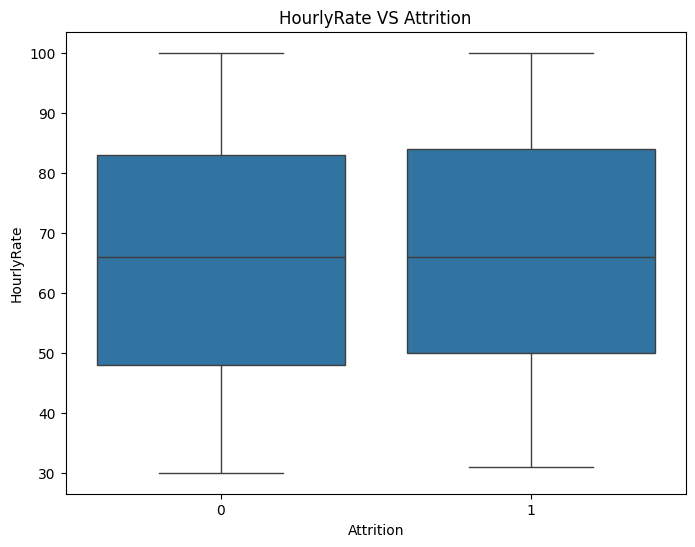

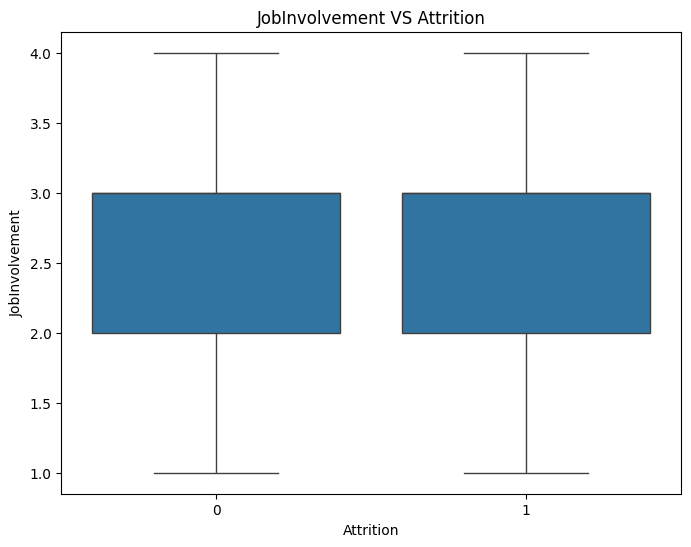

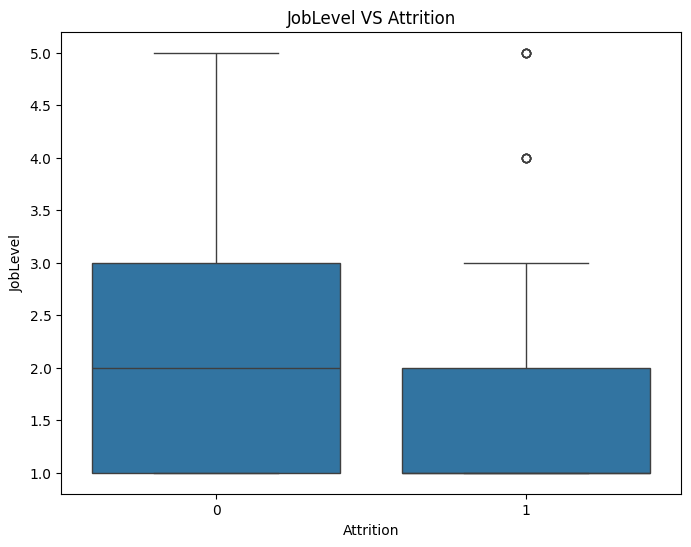

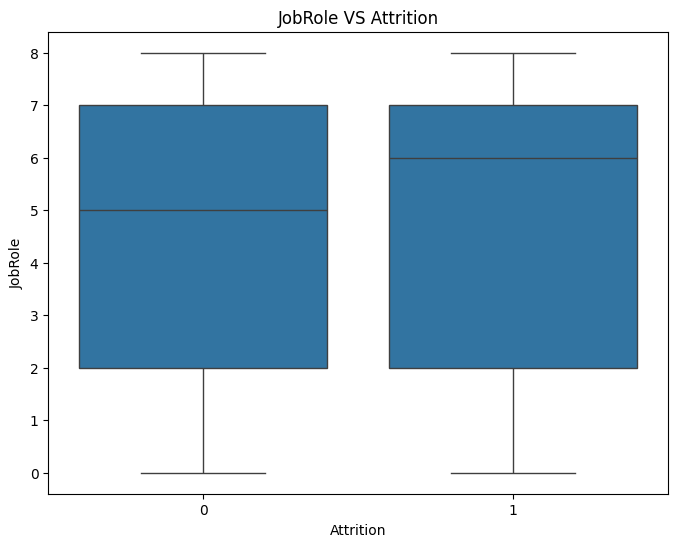

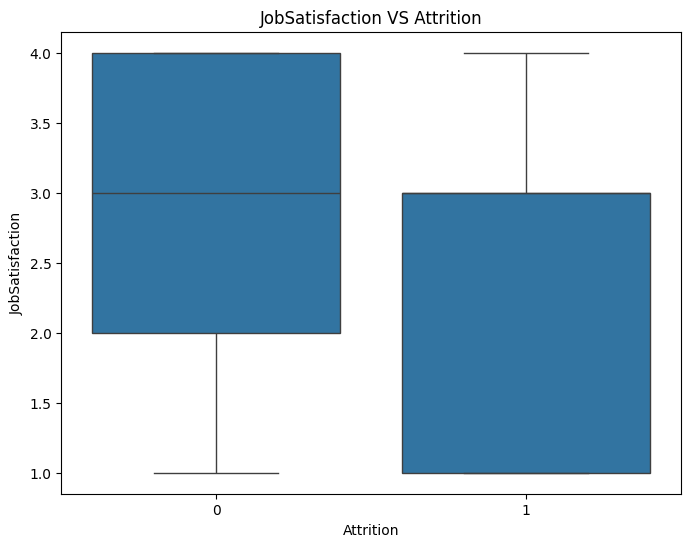

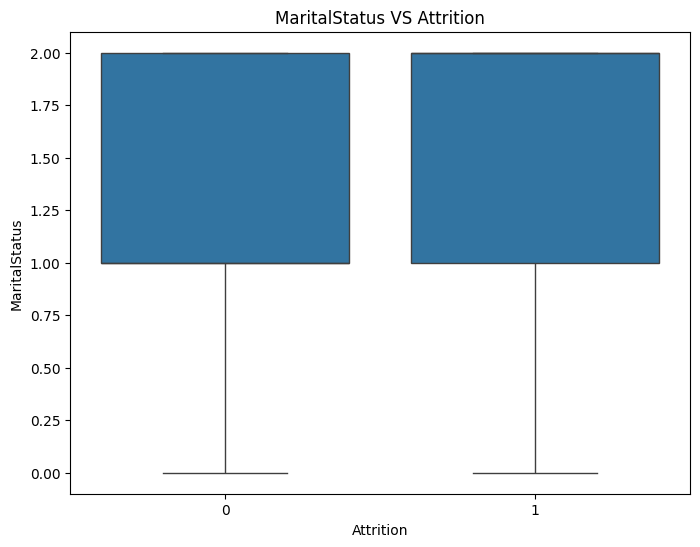

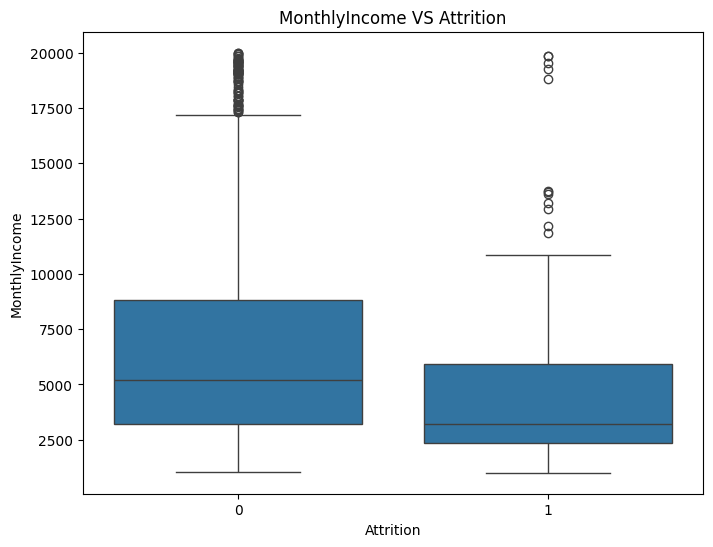

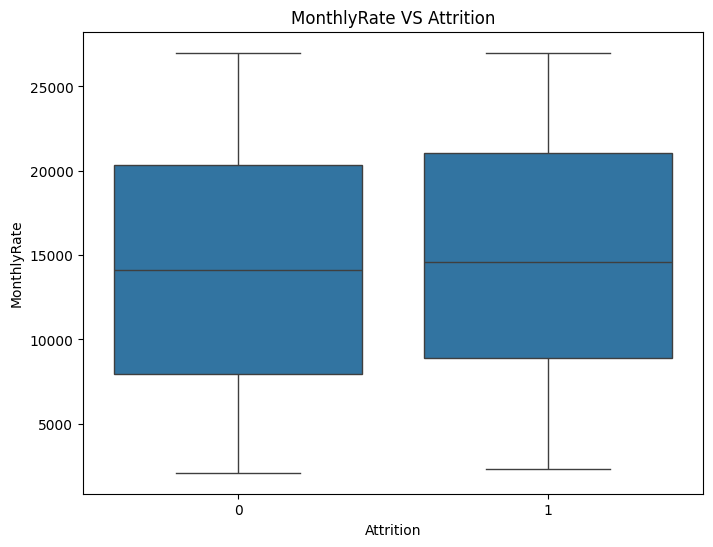

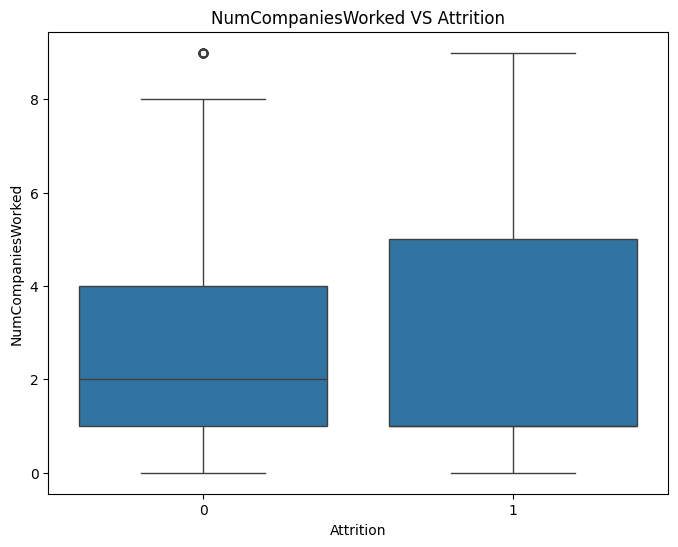

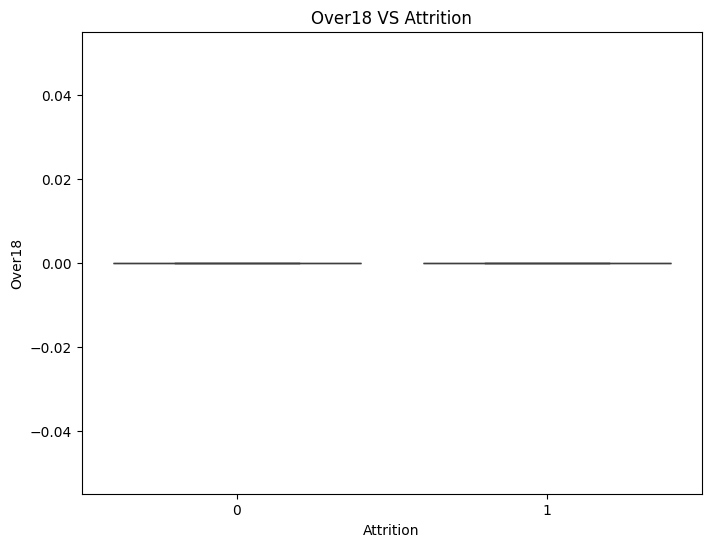

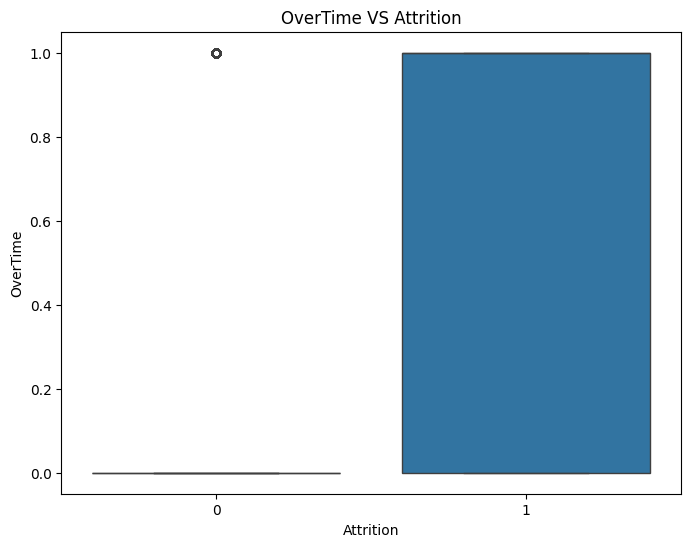

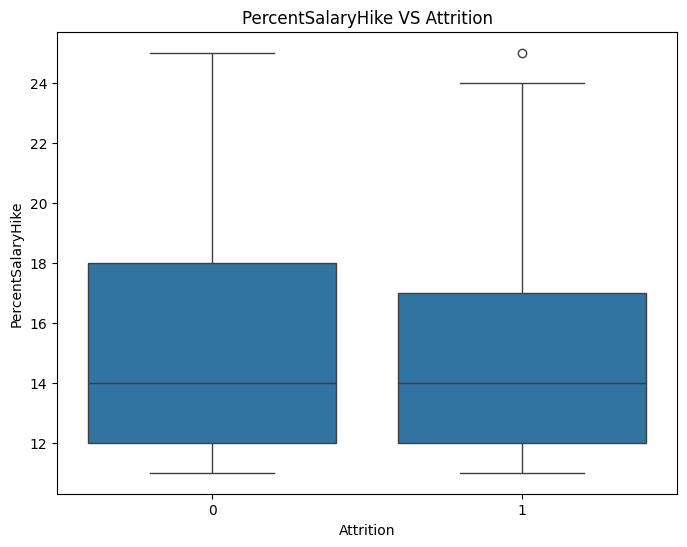

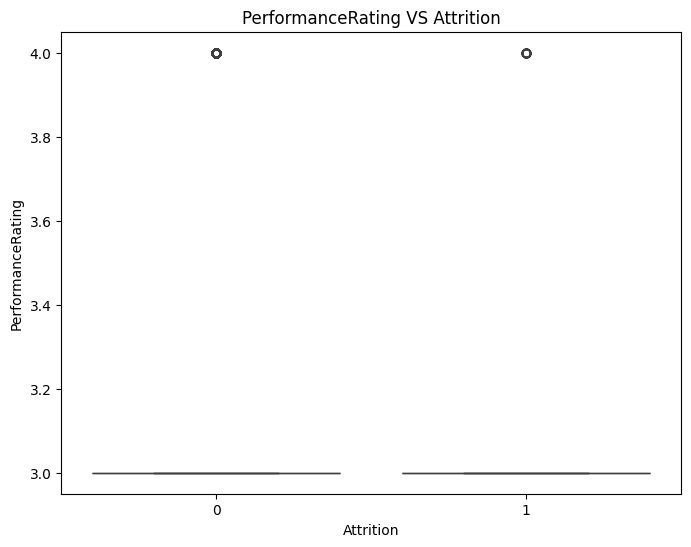

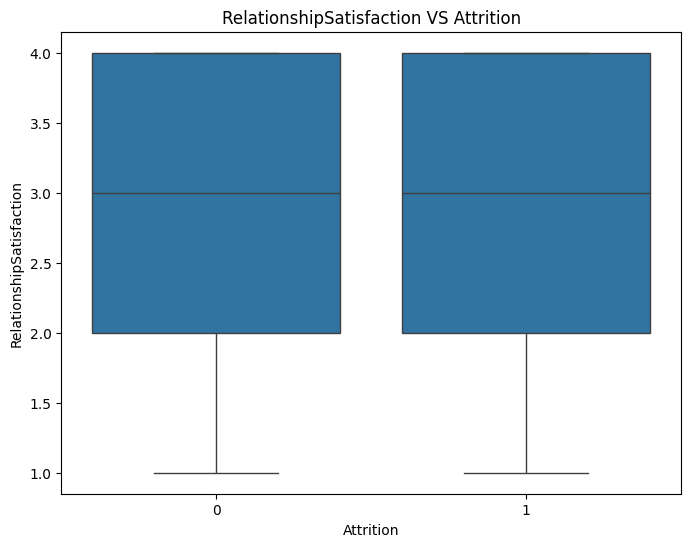

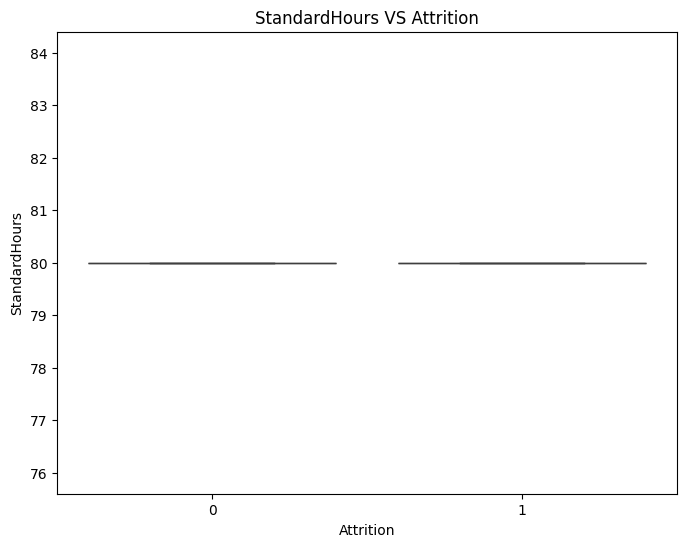

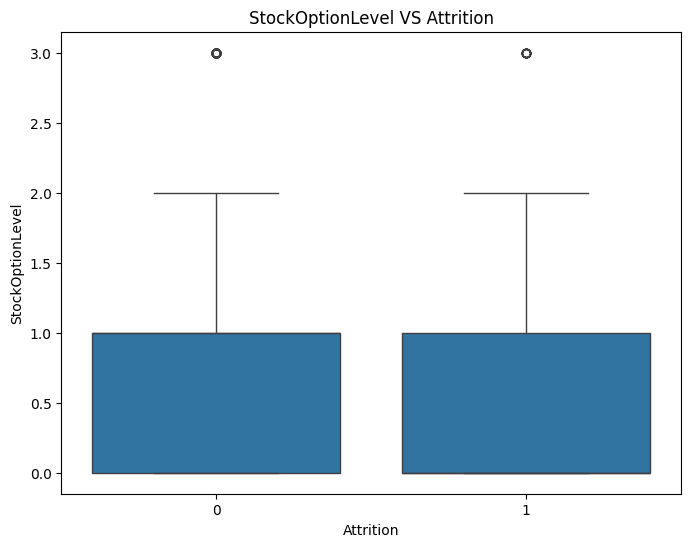

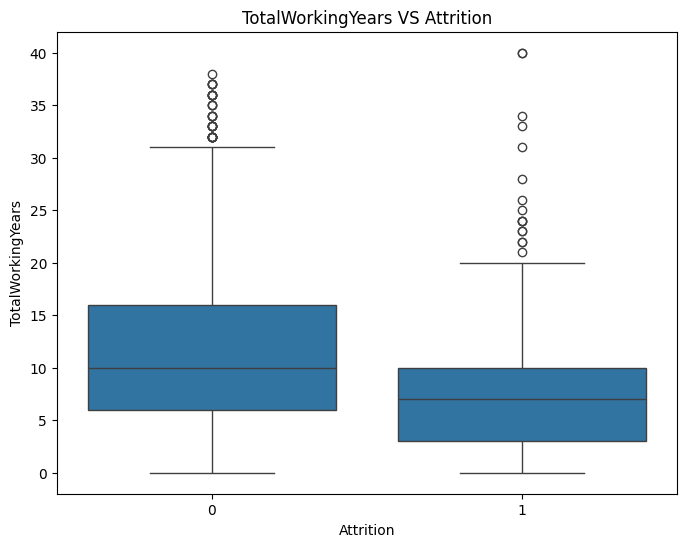

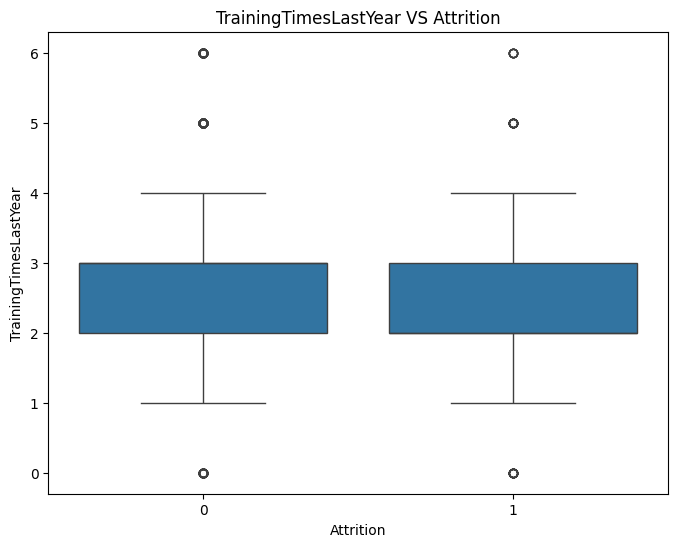

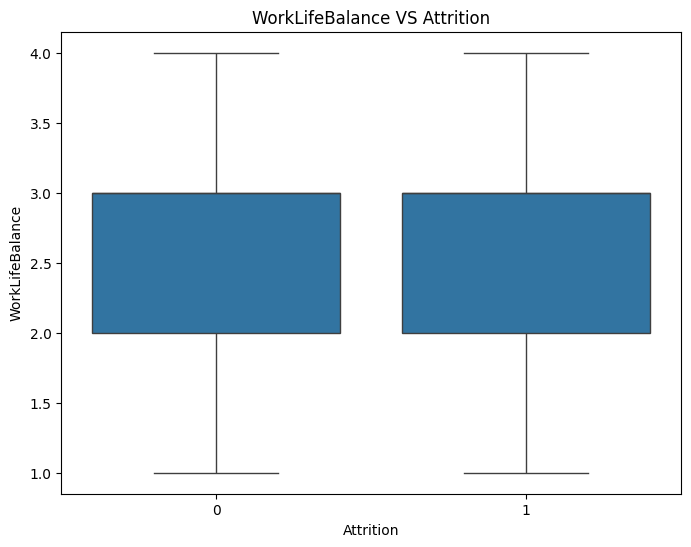

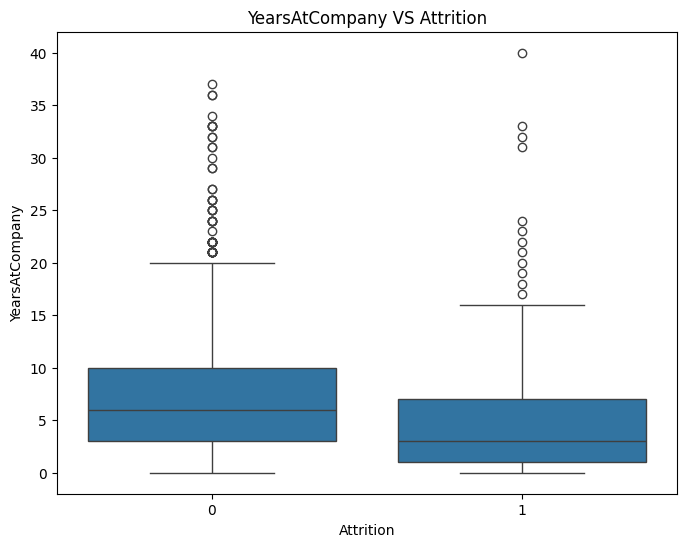

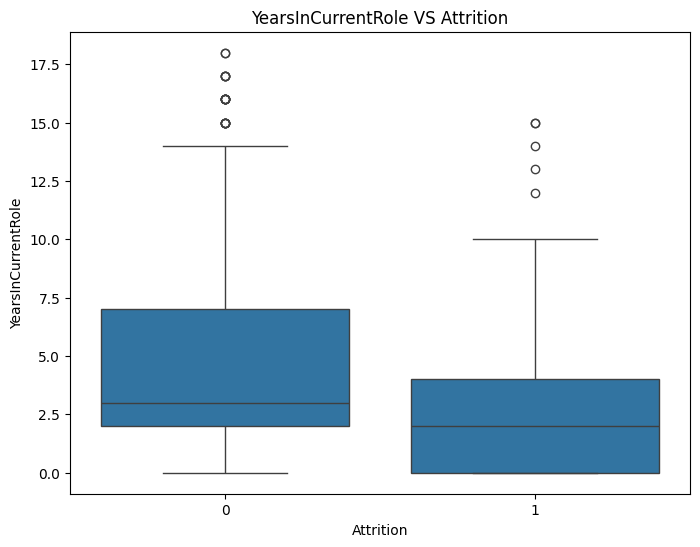

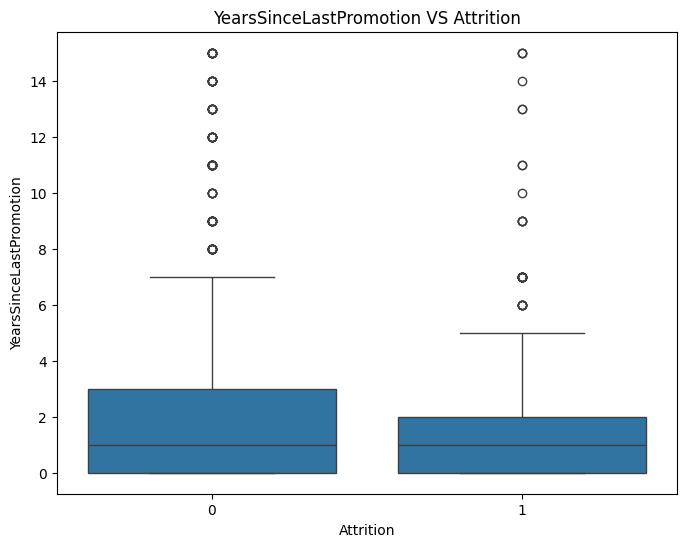

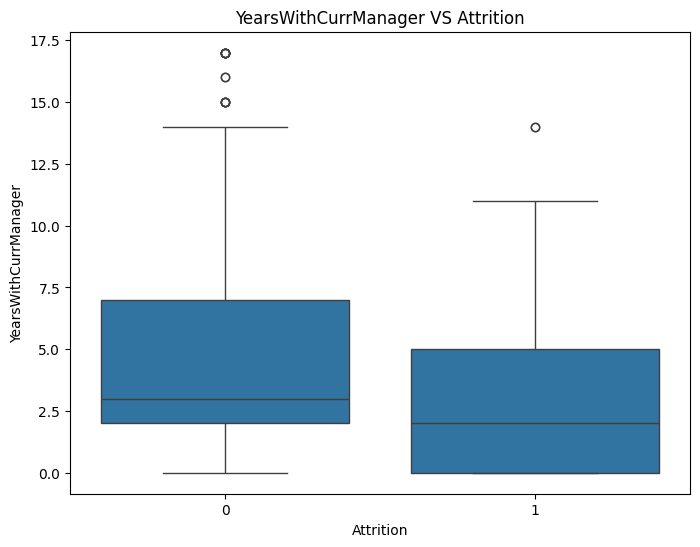

In [19]:
# Visualize distribution of numerical features by attrition 
for col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Attrition', y=col, data=data)
    plt.title(f"{col} VS Attrition")
    plt.show()

In [21]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
correlation_matrix

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


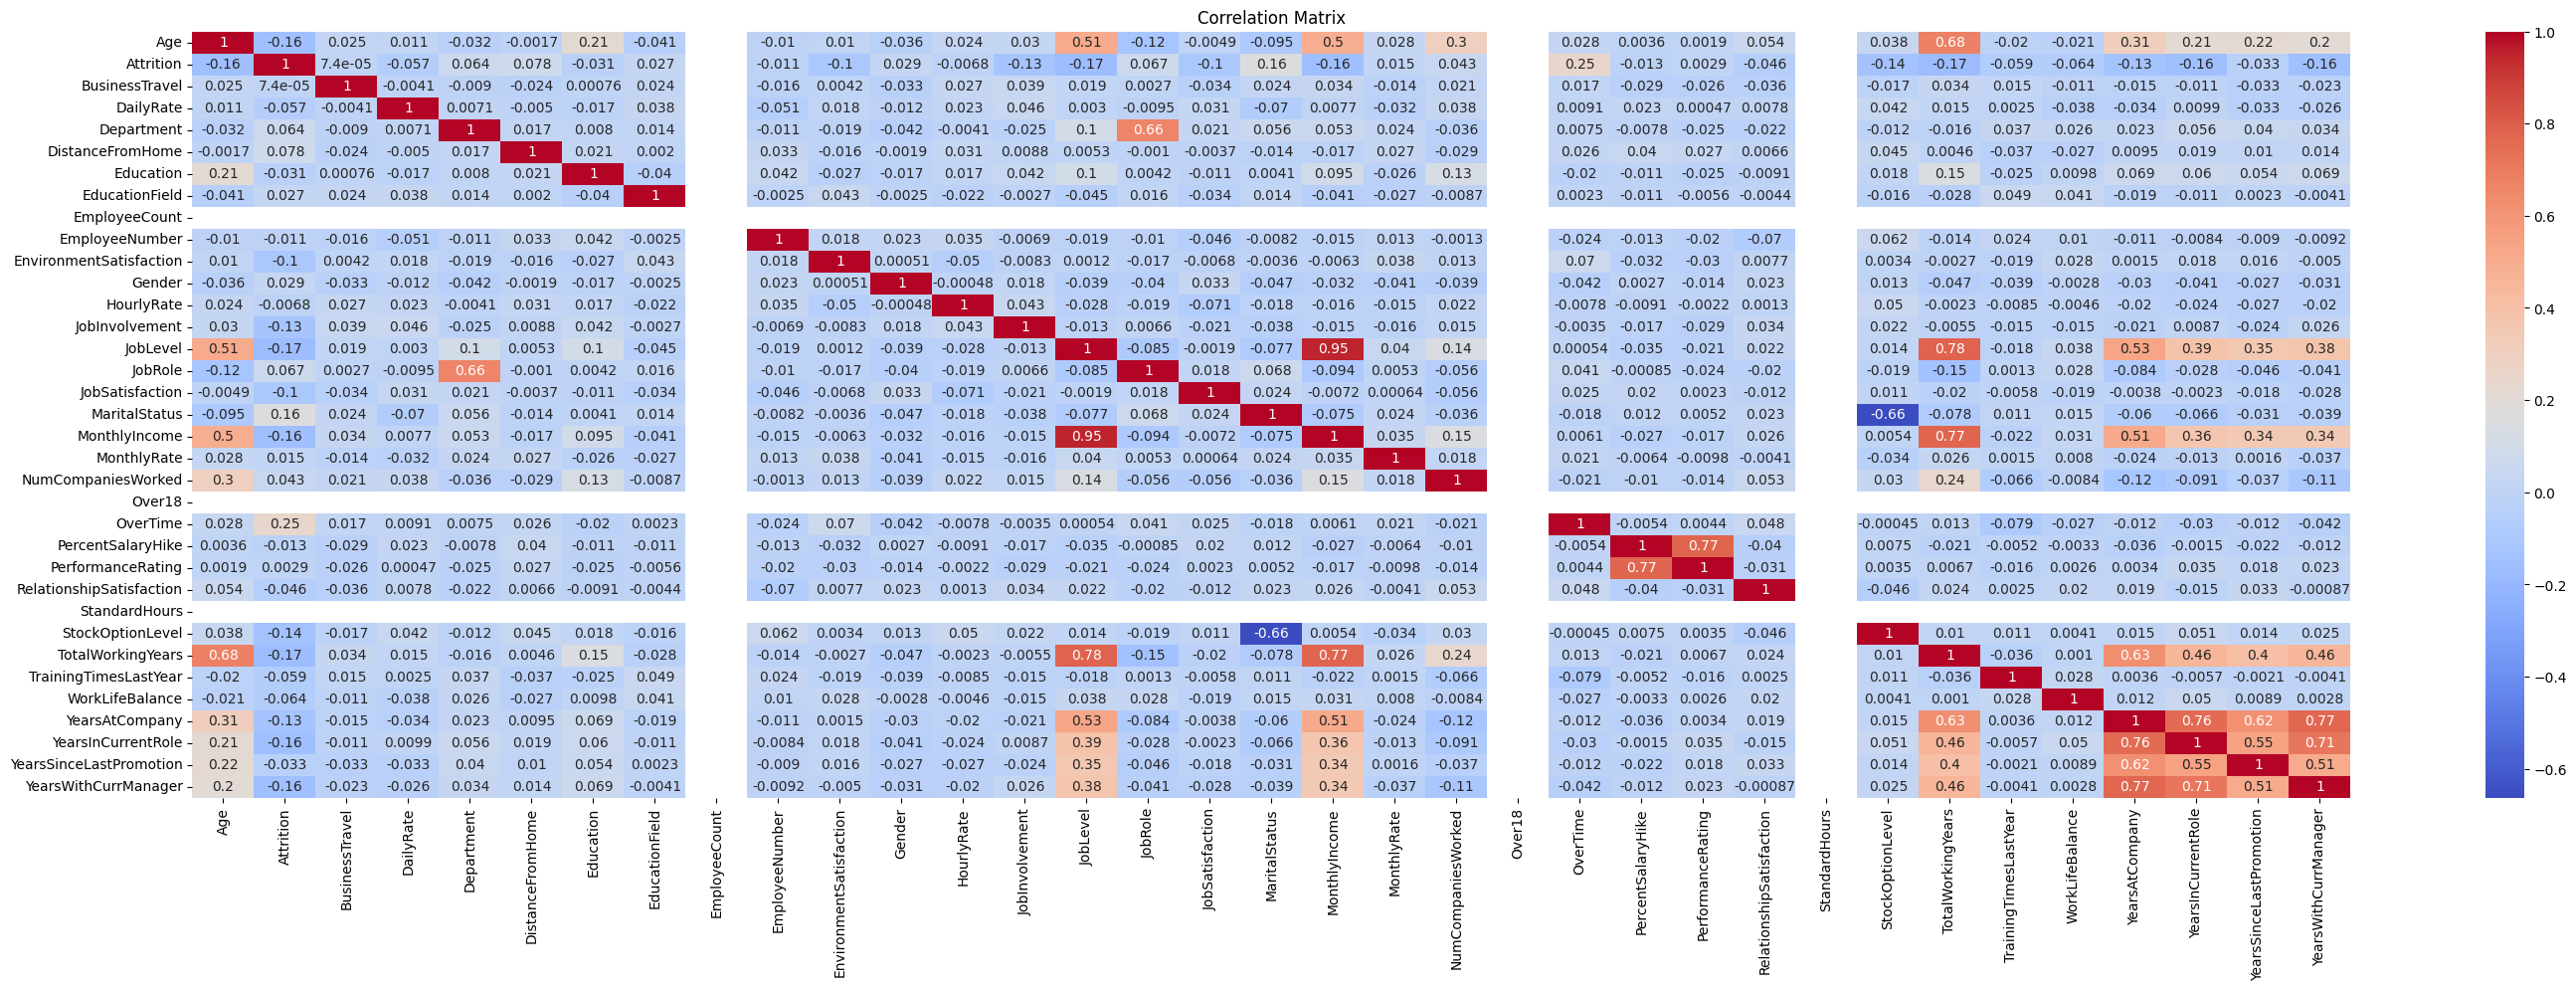

In [24]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(35, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Task 11: Multivariate Analysis:

    - Investigate interactions between multiple features.

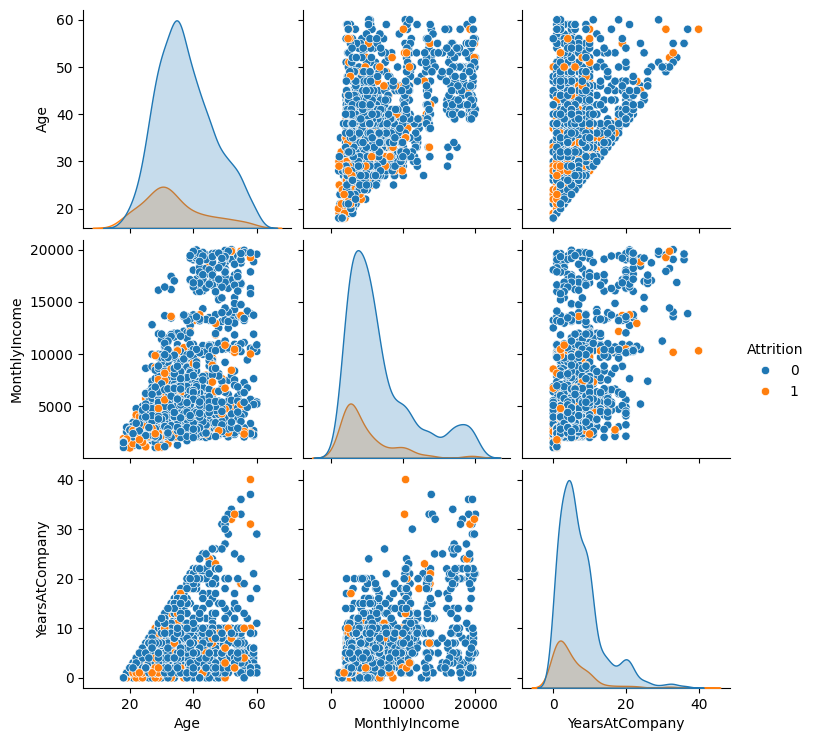

In [25]:
# Invastigate interactions between multiple features (multivariate analysis)
sns.pairplot(data[['Age', 'MonthlyIncome', 'YearsAtCompany', 'Attrition']], hue='Attrition')
plt.show()

IV. Model Building and Evaluation

- Task 12: Select a Model:

    - Choose machine learning models for classification.  We'll use Logistic Regression and Random Forest.

- Task 13: Split the Data:

    - Split the data into training and testing sets.  This was done in Task 8.
      
- Task 14: Train the Model:

    - Train the selected models on the training data.

In [26]:
# Train Logistic Regression model 
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [27]:
# Train Random Forest model 
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- Task 15: Tune Hyperparameters:

    - Optimize model performance by tuning hyperparameters using GridSearchCV.

In [28]:
# Define hyperparameter grid for Random Forest 
param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [5,10,15],
    'min_samples_split': [2,5,10], 
    'min_samples_leaf': [1,2,4]
}

In [29]:
# Perform Grid Search 
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [30]:
# Get the best parameters 
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [32]:
# Get the best model
best_rf_model = grid_search.best_estimator_
best_rf_model

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42)

- Task 16: Evaluate the Model:

    - Evaluate the model's performance on the test set.

In [33]:
# Make predictions with the Logistic Regression Model 
y_pred_logistic = log_model.predict(X_test)
y_prob_logistic = log_model.predict_proba(X_test)[:,-1]
print(y_pred_logistic, "\n")
print(y_prob_logistic, "\n")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] 

[8.30499385e-02 8.40558558e-03 1.52450197e-01 1.03195864e-02
 3.01172882e-02 1.43094098e-01 2.99067354e-01 3.67329693e-02
 1.78562616e-01 1.77295796e-02 3.91562280e-01 4.70111734e-02
 2.95052131e-01 4.60183480e-02 4.97236319e-02 4.29853545e-02
 2.77806701e-01 9.72524155e-02 4.20392166e-01 3.10094974e-02
 3.12312149e-01 7.99388460e-03 5.16306152e-02 4.76610064e-01
 1.90527427e-01 2.21966399e-02 1.25

In [36]:
# Make predictions with the Random Forest model
y_pred_rf = best_rf_model.predict(X_test)
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

In [34]:
# Evaluate Logistic Regression model
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_logistic))

Logistic Regression Metrics:
Accuracy: 0.891156462585034
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294

ROC-AUC Score: 0.7721468074409251


In [37]:
# Evaluate Random Forest model
print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))


Random Forest Metrics:
Accuracy: 0.8775510204081632
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

ROC-AUC Score: 0.7292106586224234


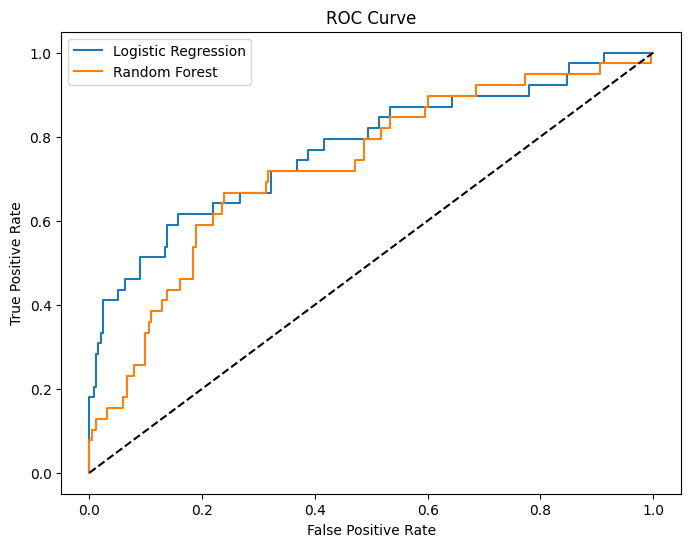

In [38]:
# Plot ROC curves
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_prob_logistic)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

V. Data Mining

- Task 17: Feature Importance Analysis:

    - Analyze feature importance to understand which factors are most predictive of attrition.  This is usually done with tree-based models like Random Forest.

In [39]:
# Get feature importances from the Random Forest model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                     Feature  Importance
21                  OverTime    0.089734
17             MonthlyIncome    0.086640
0                        Age    0.056220
27         TotalWorkingYears    0.053071
30            YearsAtCompany    0.047599
2                  DailyRate    0.046848
8             EmployeeNumber    0.042366
18               MonthlyRate    0.041245
4           DistanceFromHome    0.040041
26          StockOptionLevel    0.039775
11                HourlyRate    0.038818
19        NumCompaniesWorked    0.037731
33      YearsWithCurrManager    0.031696
14                   JobRole    0.030038
16             MaritalStatus    0.029296
13                  JobLevel    0.028502
31        YearsInCurrentRole    0.027003
22         PercentSalaryHike    0.026082
15           JobSatisfaction    0.025351
32   YearsSinceLastPromotion    0.022897
12            JobInvolvement    0.022647
28     TrainingTimesLastYear    0.021838
29           WorkLifeBalance    0.02

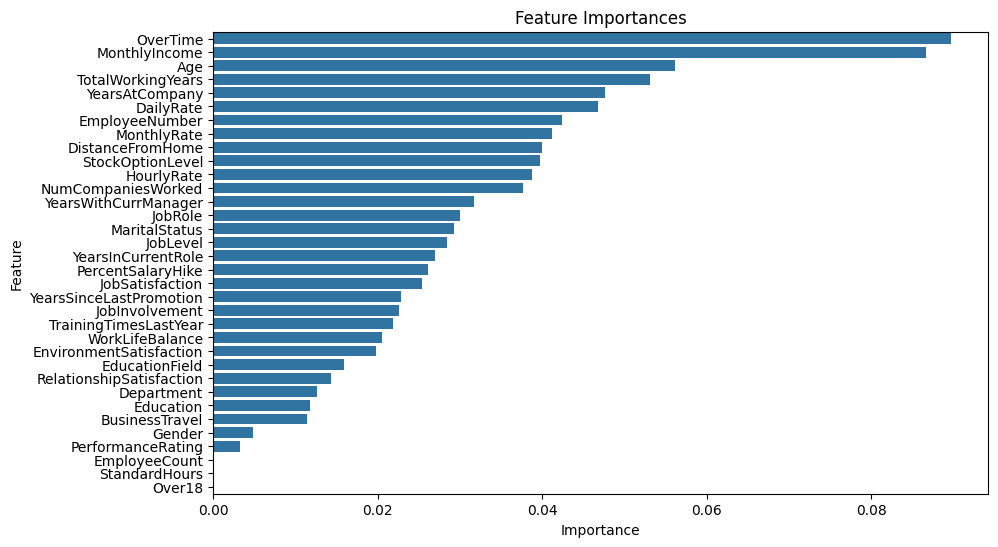

In [40]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()